In [99]:
import pandas as pd 
import numpy as np #untuk melakukan fungsi agregasi, aljabar linear
import matplotlib.pyplot as plt #library untuk visualisasi data
from numpy import nan as na
import re 

In [100]:
df = pd.read_csv('tubesprobstat.csv')
pd.set_option('display.max_columns', None)

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,185,186,187,188,189,190,191,193,194,195,196,197,198,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,249,250,251,252,253,254,255,256,257,258,259,

In [101]:
#cleaning data dilakukan dengan mengubah kolom-kolom menjadi jawaban responden
#agar lebih mudah untuk dianalisis dan diberikan pertanda angka di belakangnya agar kolom dengan nama yg sama dapat dibedakan
i=2
while(i<610) :
    df = df.rename(columns={df.columns[i] : df.iloc[0][i]+'['+str(i)+']' })
    i+=1
df = df.rename(columns={df.columns[4] : 'Nama Responden'})
data=pd.DataFrame(df)

In [102]:
data = data.drop([0])
data = data.reset_index(drop=True)
data

Nama Surveyor (Mahasiswa ) NIM Surveyor (Mahasiswa)  \
0             Vania Alya Qonita                 18219090   
1                     Abu Hanif                 13219053   
2             Nicholas Darmawan                 18219028   
3             Nicholas Darmawan                 18219028   
4                Gwyneth Winata                 10119075   
...                         ...                      ...   
2015           Sidartha Prastya                 13219033   
2016             Muhamad Taruna                 13219030   
2017                    cswadec                 19128312   
2018                       Jjjj                     2222   
2019                      Abbas                 25020002   

     STI (SIstem & Teknologi Informasi)[2] Teknik Elektro[3]   Nama Responden  \
0                                        1               NaN       indra bayu   
1                                      NaN                 2  Mediana Safira    
2                                        1               NaN    Dewi Nathania   
3                                        1               NaN    Dewi Nathania   
4                                        1               NaN   Gwyneth Winata   
...                                    ...               ...              ...   
2015                                   NaN                 2                .   
2016                                   NaN                 2              NaN   
2017                                     1               NaN            jigur   
2018                                   NaN                 2               Hh   
2019                                   NaN                 2            Abbas   

     Laki – laki[5] Perempuan[6] < 15 tahun[7] 15-20 tahun[8] 21-30 tahun[9]  \
0                 1          NaN           NaN            NaN            NaN   
1               NaN            2           NaN              2            NaN   
2               NaN            2           NaN              2            NaN   
3               NaN            2           NaN              2            NaN   
4               NaN            2           NaN              2            NaN   
...             ...          ...           ...            ...            ...   
2015              1          NaN           NaN              2            NaN   
2016            NaN          NaN           NaN            NaN            NaN   
2017            NaN            2           NaN            NaN            NaN   
2018              1          NaN           NaN              2            NaN   
2019              1          NaN           NaN              2            NaN   

     31-40 tahun[10] 41-50 tahun[11] >50 tahun[12] SD[13] SMP[14] SMA[15]  \
0                  4             NaN           NaN    NaN     NaN     NaN   
1                NaN             NaN           NaN    NaN     NaN       3   
2                NaN             NaN           NaN    NaN     NaN       3   
3                NaN             NaN           NaN    NaN     NaN       3   
4                NaN             NaN           NaN    NaN     NaN       3   
...              ...             ...           ...    ...     ...     ...   
2015             NaN             NaN           NaN    NaN     NaN       3   
2016             NaN             NaN           NaN    NaN     NaN     NaN   
2017             NaN             NaN             6      1     NaN     NaN   
2018             NaN             NaN           NaN    NaN     NaN     NaN   
2019             NaN             NaN           NaN    NaN     NaN     NaN   

     S1[16] S2[17] S3[18] Pelajar / Mahasiswa[19] Karyawan Swasta[20]  \
0       NaN      5    NaN                     NaN                   2   
1       NaN    NaN    NaN                       1                 NaN   
2       NaN    NaN    NaN                       1                 NaN   
3       NaN    NaN    NaN                       1                 NaN   
4       NaN    NaN    NaN                       1           

In [103]:
data.dropna(thresh = 0.2*68, inplace = True)
data = data.reset_index(drop = True)
data
#dari total 68 pertanyaan yang ada, baik jawaban ganda maupun singular diasumsikan responden menjawab minimal tiap pertanyaan 1
#data responden yang mengisi kurang dari 20% total pertanyaan akan di-drop 

Nama Surveyor (Mahasiswa ) NIM Surveyor (Mahasiswa)  \
0             Vania Alya Qonita                 18219090   
1                     Abu Hanif                 13219053   
2             Nicholas Darmawan                 18219028   
3                Gwyneth Winata                 10119075   
4             Ferdian Airlangga                 18219112   
...                         ...                      ...   
1823         Dwi Ananda Sanbari                 13219044   
1824            Leonardo Gianto                 13219001   
1825                   fcaswswd                     2143   
1826                    cswadec                 19128312   
1827                      Abbas                 25020002   

     STI (SIstem & Teknologi Informasi)[2] Teknik Elektro[3]  \
0                                        1               NaN   
1                                      NaN                 2   
2                                        1               NaN   
3                                        1               NaN   
4                                        1               NaN   
...                                    ...               ...   
1823                                   NaN                 2   
1824                                   NaN                 2   
1825                                     1               NaN   
1826                                     1               NaN   
1827                                   NaN                 2   

             Nama Responden Laki – laki[5] Perempuan[6] < 15 tahun[7]  \
0                indra bayu              1          NaN           NaN   
1           Mediana Safira             NaN            2           NaN   
2             Dewi Nathania            NaN            2           NaN   
3            Gwyneth Winata            NaN            2           NaN   
4                 Azka Alya            NaN            2           NaN   
...                     ...            ...          ...           ...   
1823  Vinsi Nurlita Agustin            NaN            2           NaN   
1824                    NaN            NaN          NaN           NaN   
1825                 324252            NaN            2           NaN   
1826                  jigur            NaN            2           NaN   
1827                  Abbas              1          NaN           NaN   

     15-20 tahun[8] 21-30 tahun[9] 31-40 tahun[10] 41-50 tahun[11]  \
0               NaN            NaN               4             NaN   
1                 2            NaN             NaN             NaN   
2                 2            NaN             NaN             NaN   
3                 2            NaN             NaN             NaN   
4                 2            NaN             NaN             NaN   
...             ...            ...             ...             ...   
1823              2            NaN             NaN             NaN   
1824            NaN            NaN             NaN             NaN   
1825            NaN            NaN             NaN             NaN   
1826            NaN            NaN             NaN             NaN   
1827              2            NaN             NaN             NaN   

     >50 tahun[12] SD[13] SMP[14] SMA[15] S1[16] S2[17] S3[18]  \
0              NaN    NaN     NaN     NaN    NaN      5    NaN   
1              NaN    NaN     NaN       3    NaN    NaN    NaN   
2              NaN    NaN     NaN       3    NaN    NaN    NaN   
3              NaN    NaN     NaN       3    NaN    NaN    NaN   
4              NaN    NaN     NaN       3    NaN    NaN    NaN   
...            ...    ...     ...     ...    ...    ...    ...   
1823           NaN    NaN     NaN       3    NaN    NaN    NaN   
1824           NaN    NaN     NaN     NaN    NaN    NaN    NaN   
1825             6    NaN       2     NaN    NaN    NaN    NaN   
1826             6      1     NaN     NaN    NaN    NaN    NaN   
1827           NaN    NaN     NaN     NaN      4    NaN    NaN   

    

In [106]:
#setelah di drop data yang kurang dari 20%, data yang yang diisi dengan NIM yang tidak valid juga di-drop
for i in range(len(data)) :
    if not (re.findall('^132', data[data.columns[1]][i]) or re.findall('^182',data[data.columns[1]][i])):
        data.drop([i],inplace = True)
#untuk pembersihan terakhir, responden yang mengisi dua kali dihapus duplicatenya
data.drop_duplicates(subset = ['NIM Surveyor (Mahasiswa)','Nama Responden'],inplace = True)
data = data.reset_index(drop= True)
data

Nama Surveyor (Mahasiswa ) NIM Surveyor (Mahasiswa)  \
0                 Vania Alya Qonita                 18219090   
1                         Abu Hanif                 13219053   
2                 Nicholas Darmawan                 18219028   
3                 Ferdian Airlangga                 18219112   
4                Nathaniel Angelius                 18219070   
...                             ...                      ...   
1675                 Chintya Wijaya                 18219082   
1676       Muhammad Morteza Mudrick                 13219061   
1677  Patricia Aurelia Tekad Tuerah                 18219056   
1678                   ahshjagsjhag                 13219027   
1679                Leonardo Gianto                 13219001   

     STI (SIstem & Teknologi Informasi)[2] Teknik Elektro[3]  \
0                                        1               NaN   
1                                      NaN                 2   
2                                        1               NaN   
3                                        1               NaN   
4                                        1               NaN   
...                                    ...               ...   
1675                                     1               NaN   
1676                                   NaN                 2   
1677                                     1               NaN   
1678                                   NaN                 2   
1679                                   NaN                 2   

        Nama Responden Laki – laki[5] Perempuan[6] < 15 tahun[7]  \
0           indra bayu              1          NaN           NaN   
1      Mediana Safira             NaN            2           NaN   
2        Dewi Nathania            NaN            2           NaN   
3            Azka Alya            NaN            2           NaN   
4     Michael Sugianto              1          NaN           NaN   
...                ...            ...          ...           ...   
1675     Hokki Suwanda              1          NaN           NaN   
1676            Danang              1          NaN           NaN   
1677   Felicia Gillian            NaN            2           NaN   
1678             saasa              1          NaN           NaN   
1679               NaN            NaN          NaN           NaN   

     15-20 tahun[8] 21-30 tahun[9] 31-40 tahun[10] 41-50 tahun[11]  \
0               NaN            NaN               4             NaN   
1                 2            NaN             NaN             NaN   
2                 2            NaN             NaN             NaN   
3                 2            NaN             NaN             NaN   
4                 2            NaN             NaN             NaN   
...             ...            ...             ...             ...   
1675              2            NaN             NaN             NaN   
1676              2            NaN             NaN             NaN   
1677              2            NaN             NaN             NaN   
1678              2            NaN             NaN             NaN   
1679            NaN            NaN             NaN             NaN   

     >50 tahun[12] SD[13] SMP[14] SMA[15] S1[16] S2[17] S3[18]  \
0              NaN    NaN     NaN     NaN    NaN      5    NaN   
1              NaN    NaN     NaN       3    NaN    NaN    NaN   
2              NaN    NaN     NaN       3    NaN    NaN    NaN   
3              NaN    NaN     NaN       3    NaN    NaN    NaN   
4              NaN    NaN     NaN       3    NaN    NaN    NaN   
...            ...    ...     ...     ...    ...    ...    ...   
1675           NaN    NaN     NaN       3    NaN    NaN    NaN   
1676           NaN    NaN     NaN       3    NaN    NaN    NaN   
1677           NaN    NaN     NaN       3    NaN    NaN    NaN   
1678           NaN    NaN     NaN       3    NaN    NaN    NaN   
1679           NaN    NaN     NaN     NaN    NaN    NaN    NaN   

     Pelajar / Mahas

In [107]:
#fungsi untuk membuat visualisasi data
def bikinpie(A,B,Judul):
    data[data.columns[A:B+1]].notnull().sum().plot(kind = "pie" , autopct = "%1.2f%%", subplots=True,label = Judul)
def bikinbarh(A,B,Judul):
    ax = data[data.columns[A:B+1]].notnull().sum().plot(kind='barh', width = 0.8 ,title=Judul,color = 'Black')

    total = len(data[data.columns[A:B]])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

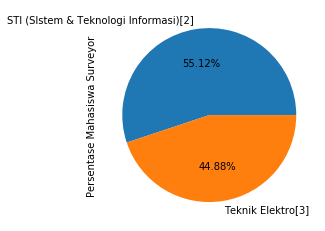

In [108]:
#visualisasi data dimulai dari pertanyaan paling awal ke akhir dari survey
bikinpie(2,3,"Persentase Mahasiswa Surveyor")

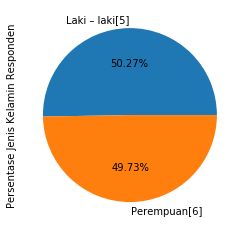

In [109]:
bikinpie(5,6,"Persentase Jenis Kelamin Responden")

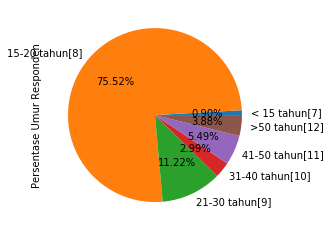

In [110]:
bikinpie(7,12,"Persentase Umur Responden")

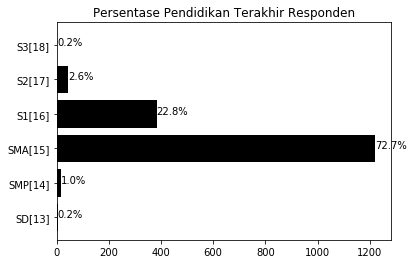

In [111]:
bikinbarh(13,18,"Persentase Pendidikan Terakhir Responden")

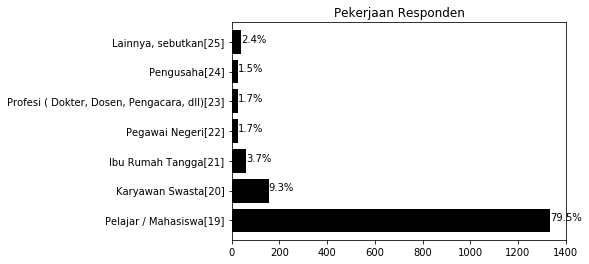

In [112]:
bikinbarh(19,25,"Pekerjaan Responden")

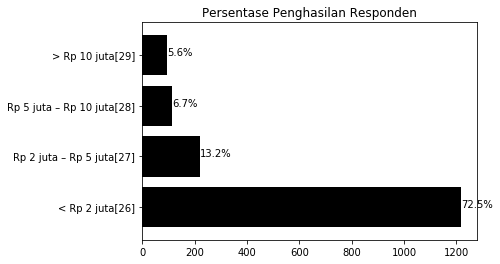

In [113]:
bikinbarh(26,29,"Persentase Penghasilan Responden")

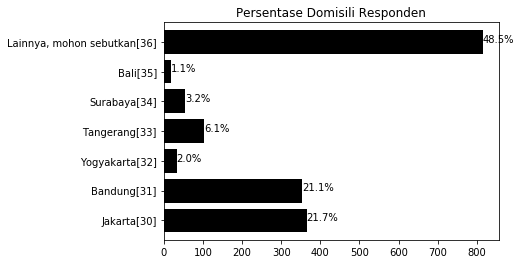

In [114]:
bikinbarh(30,36,"Persentase Domisili Responden")

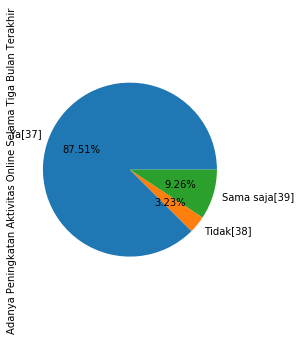

In [115]:
bikinpie(37,39,"Adanya Peningkatan Aktivitas Online Selama Tiga Bulan Terakhir")

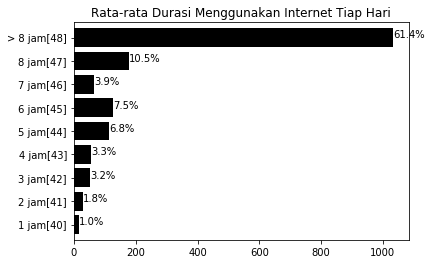

In [116]:
bikinbarh(40,48,"Rata-rata Durasi Menggunakan Internet Tiap Hari")

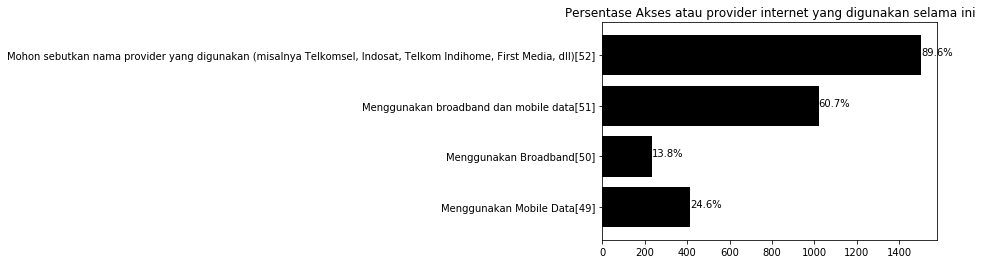

In [117]:
bikinbarh(49,52,"Persentase Akses atau provider internet yang digunakan selama ini")

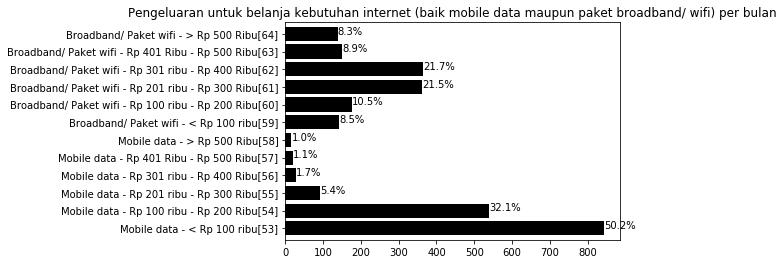

In [118]:
bikinbarh(53,64,"Pengeluaran untuk belanja kebutuhan internet (baik mobile data maupun paket broadband/ wifi) per bulan")

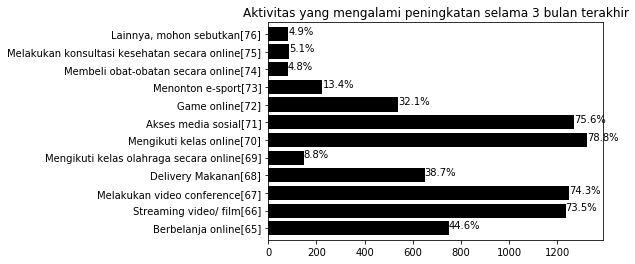

In [119]:
bikinbarh(65,76,"Aktivitas yang mengalami peningkatan selama 3 bulan terakhir")

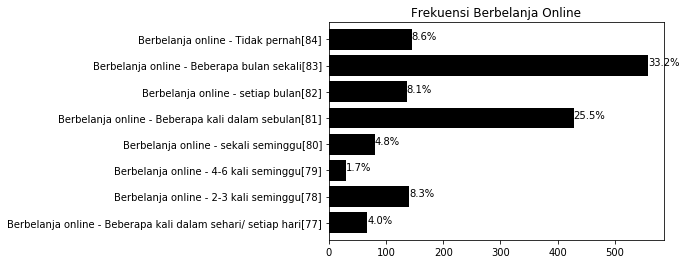

In [120]:
bikinbarh(77,84,"Frekuensi Berbelanja Online")

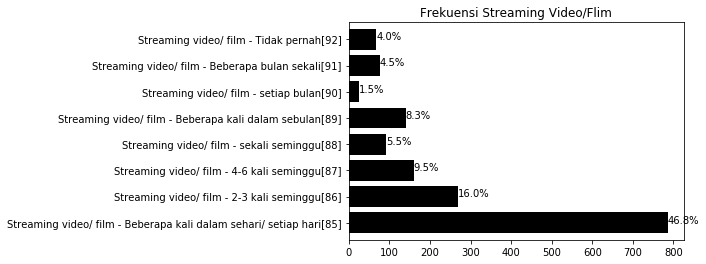

In [121]:
bikinbarh(85,92,"Frekuensi Streaming Video/Flim")

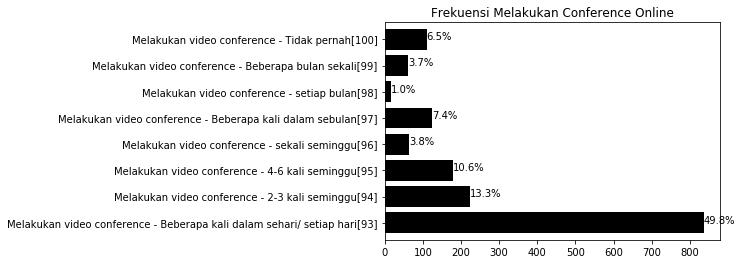

In [122]:
bikinbarh(93,100,"Frekuensi Melakukan Conference Online")

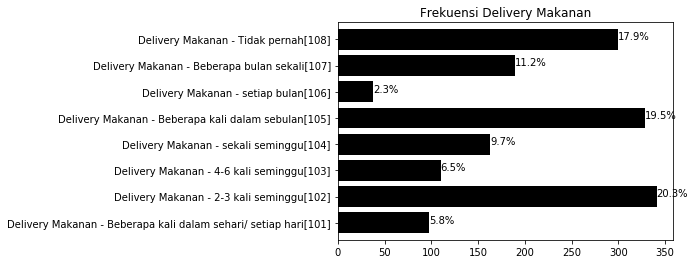

In [123]:
bikinbarh(101,108,"Frekuensi Delivery Makanan")

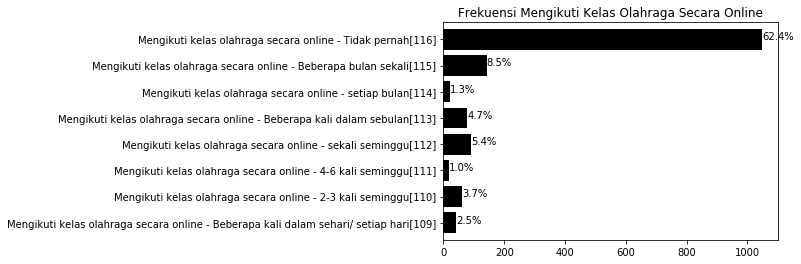

In [124]:
bikinbarh(109,116,"Frekuensi Mengikuti Kelas Olahraga Secara Online")

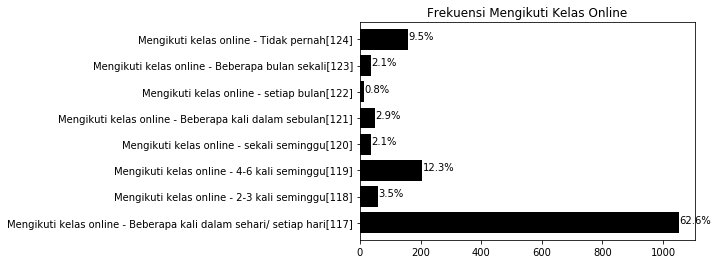

In [125]:
bikinbarh(117,124,"Frekuensi Mengikuti Kelas Online")

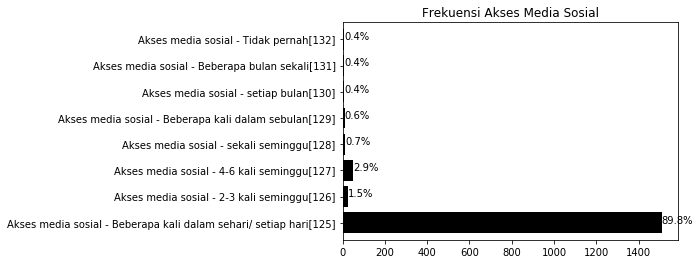

In [126]:
bikinbarh(125,132,"Frekuensi Akses Media Sosial")

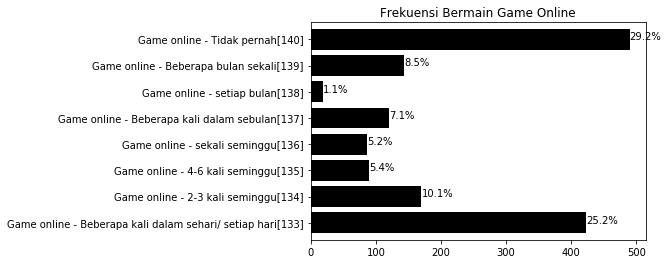

In [127]:
bikinbarh(133,140,"Frekuensi Bermain Game Online")

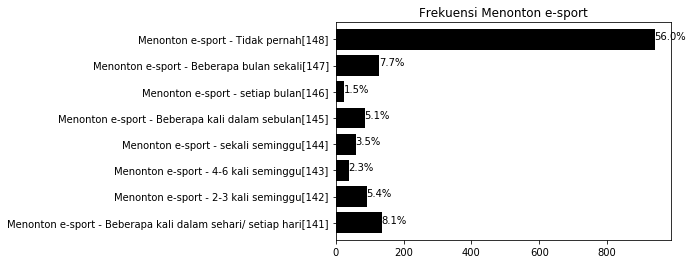

In [128]:
bikinbarh(141,148,"Frekuensi Menonton e-sport")

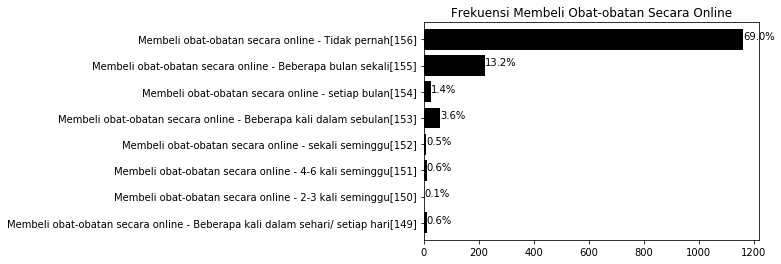

In [129]:
bikinbarh(149,156,"Frekuensi Membeli Obat-obatan Secara Online")

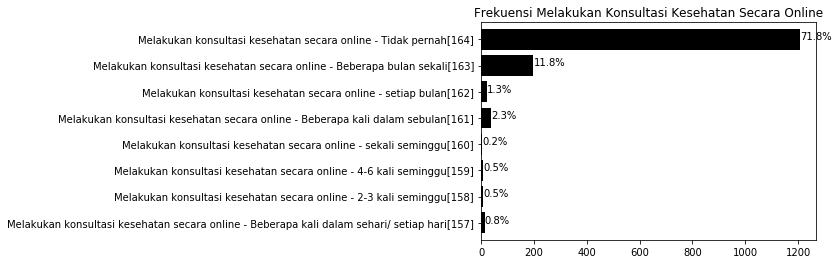

In [130]:
bikinbarh(157,164,"Frekuensi Melakukan Konsultasi Kesehatan Secara Online")

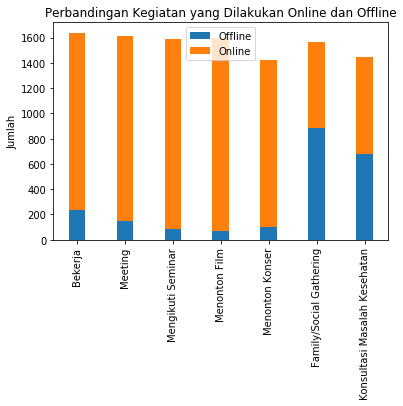

In [131]:
labels = ["Bekerja","Meeting","Mengikuti Seminar","Menonton Film","Menonton Konser","Family/Social Gathering","Konsultasi Masalah Kesehatan"]
men_means = [data[data.columns[i]].notnull().sum() for i in range(165,178,2)]
women_means = [data[data.columns[i]].notnull().sum() for i in range(166,179,2)]

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width,  label='Offline')
ax.bar(labels, women_means, width,  bottom=men_means,
       label='Online')

ax.set_xticklabels(labels,rotation = 90)
ax.set_ylabel('Jumlah')
ax.set_title('Perbandingan Kegiatan yang Dilakukan Online dan Offline')
ax.legend()

plt.show()

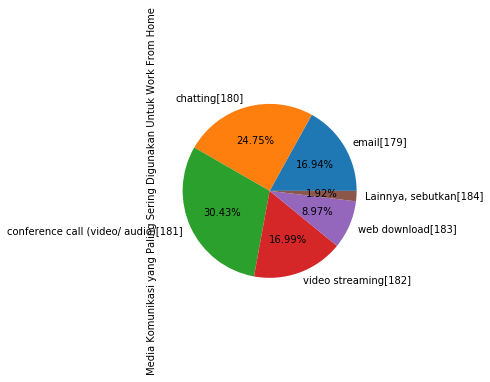

In [132]:
bikinpie(179,184,"Media Komunikasi yang Paling Sering Digunakan Untuk Work From Home")

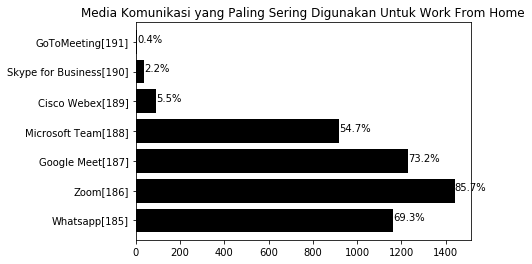

In [133]:
bikinbarh(185,191,"Media Komunikasi yang Paling Sering Digunakan Untuk Work From Home")

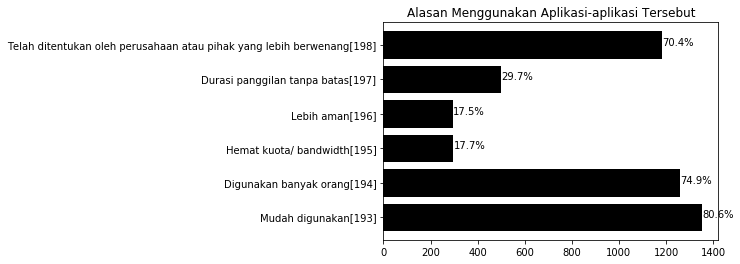

In [134]:
bikinbarh(193,198,"Alasan Menggunakan Aplikasi-aplikasi Tersebut")

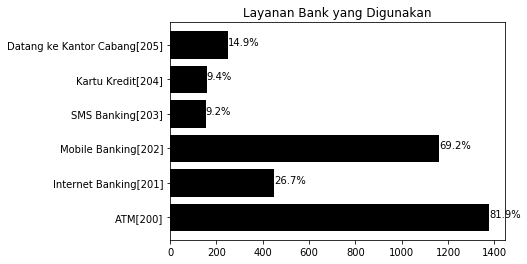

In [135]:
bikinbarh(200,205,"Layanan Bank yang Digunakan")

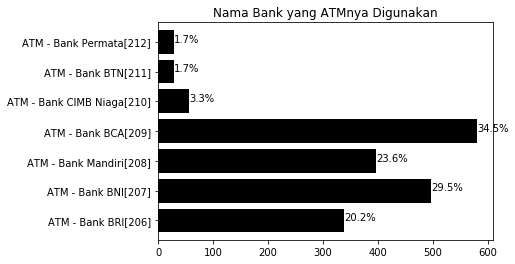

In [136]:
bikinbarh(206,212,"Nama Bank yang ATMnya Digunakan")

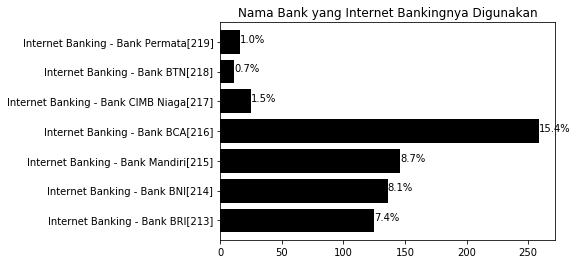

In [137]:
bikinbarh(213,219,"Nama Bank yang Internet Bankingnya Digunakan")

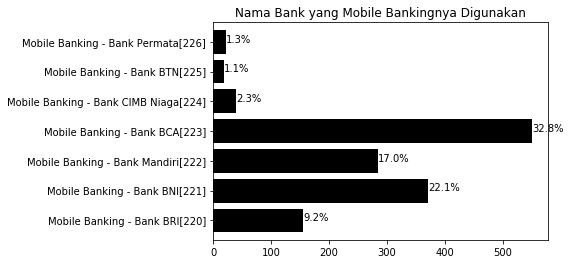

In [138]:
bikinbarh(220,226,"Nama Bank yang Mobile Bankingnya Digunakan")

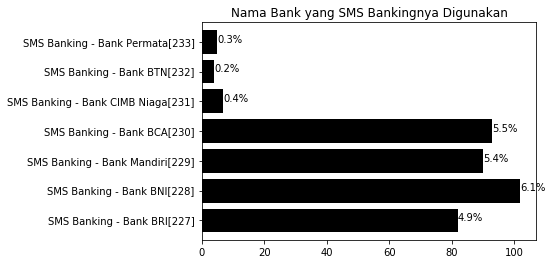

In [139]:
bikinbarh(227,233,"Nama Bank yang SMS Bankingnya Digunakan")

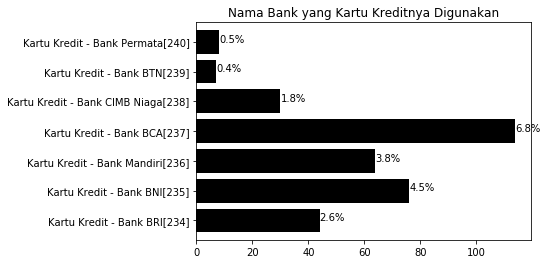

In [140]:
bikinbarh(234,240,"Nama Bank yang Kartu Kreditnya Digunakan")

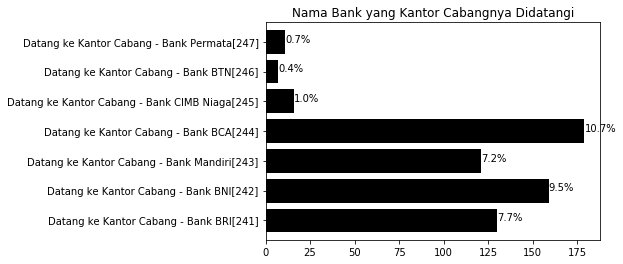

In [141]:
bikinbarh(241,247,"Nama Bank yang Kantor Cabangnya Didatangi")

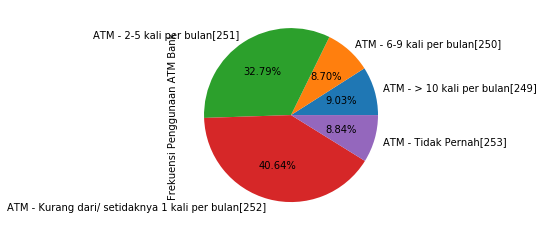

In [142]:
bikinpie(249,253,"Frekuensi Penggunaan ATM Bank")

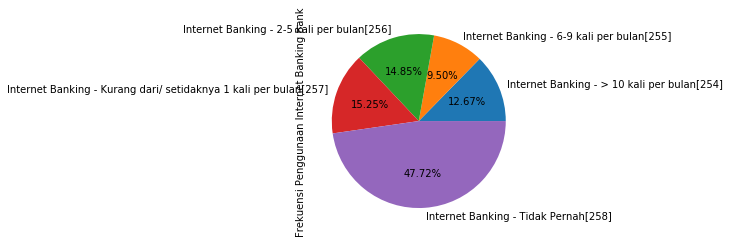

In [143]:
bikinpie(254,258,"Frekuensi Penggunaan Internet Banking Bank")

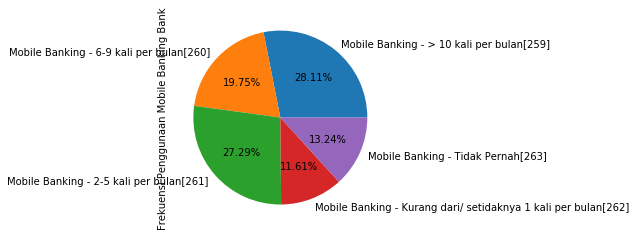

In [144]:
bikinpie(259,263,"Frekuensi Penggunaan Mobile Banking Bank")

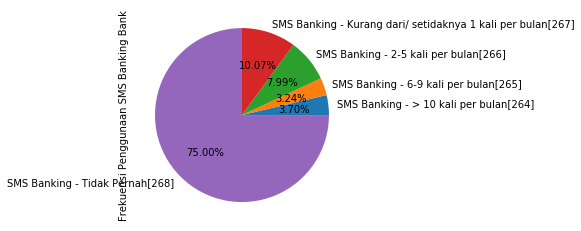

In [145]:
bikinpie(264,268,"Frekuensi Penggunaan SMS Banking Bank")

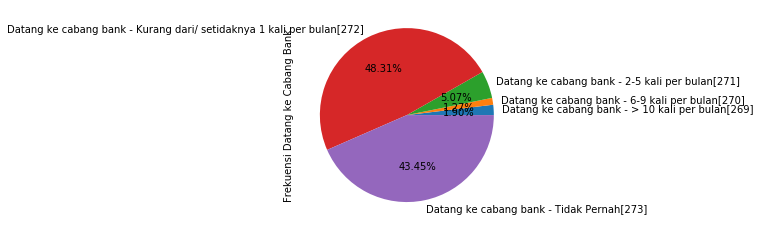

In [146]:
bikinpie(269,273,"Frekuensi Datang ke Cabang Bank")

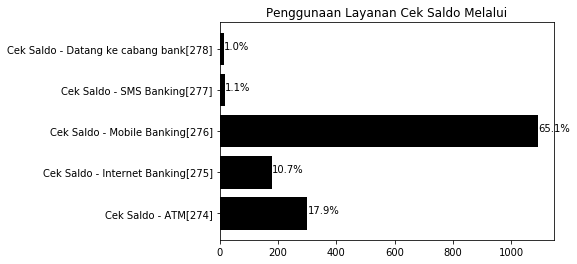

In [147]:
bikinbarh(274,278,"Penggunaan Layanan Cek Saldo Melalui")

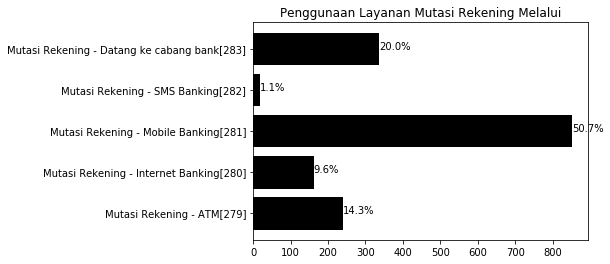

In [148]:
bikinbarh(279,283,"Penggunaan Layanan Mutasi Rekening Melalui")

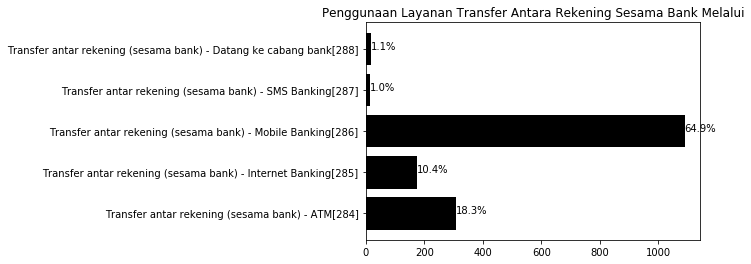

In [149]:
bikinbarh(284,288,"Penggunaan Layanan Transfer Antara Rekening Sesama Bank Melalui")

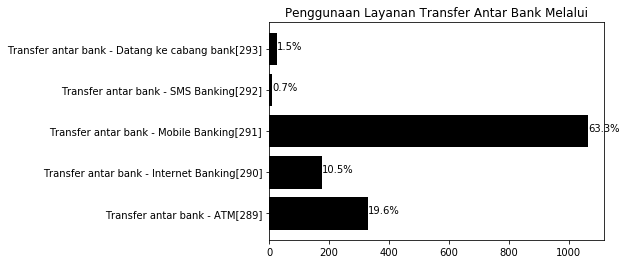

In [150]:
bikinbarh(289,293,"Penggunaan Layanan Transfer Antar Bank Melalui")

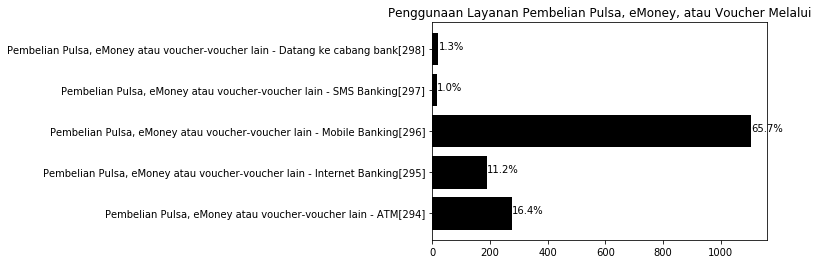

In [151]:
bikinbarh(294,298,"Penggunaan Layanan Pembelian Pulsa, eMoney, atau Voucher Melalui")

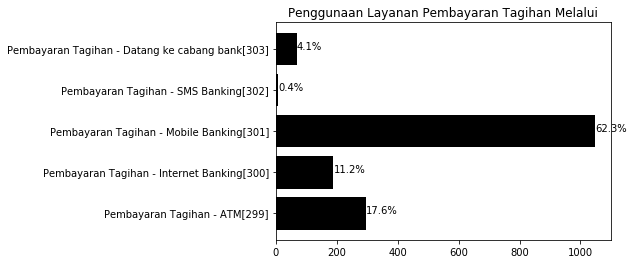

In [152]:
bikinbarh(299,303,"Penggunaan Layanan Pembayaran Tagihan Melalui")

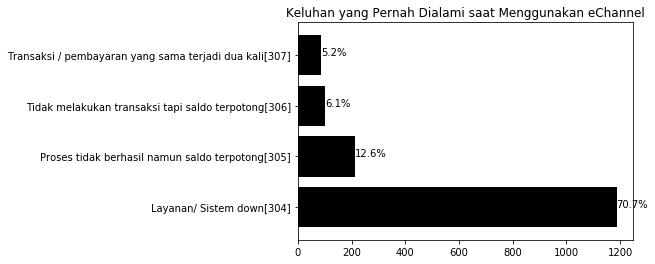

In [153]:
bikinbarh(304,307,"Keluhan yang Pernah Dialami saat Menggunakan eChannel")

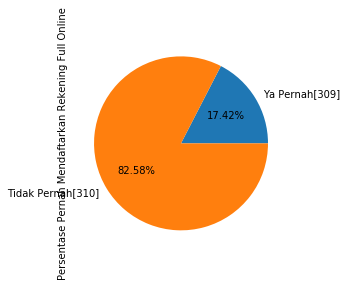

In [154]:
bikinpie(309,310,"Persentase Pernah Mendaftarkan Rekening Full Online")

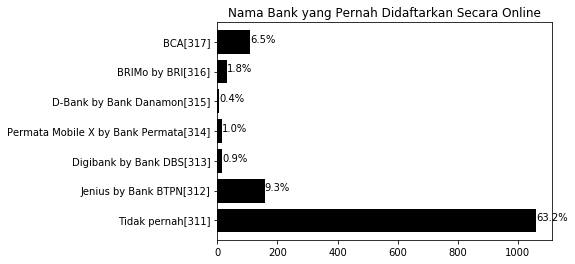

In [155]:
bikinbarh(311,317,"Nama Bank yang Pernah Didaftarkan Secara Online")

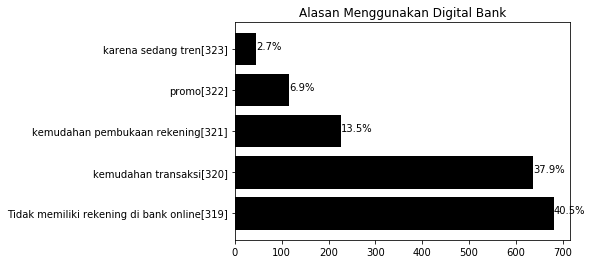

In [156]:
bikinbarh(319,323,"Alasan Menggunakan Digital Bank")

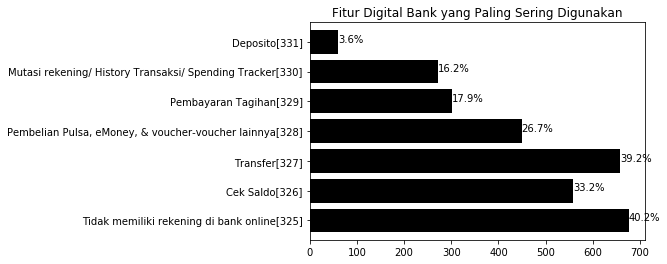

In [157]:
bikinbarh(325,331,"Fitur Digital Bank yang Paling Sering Digunakan")

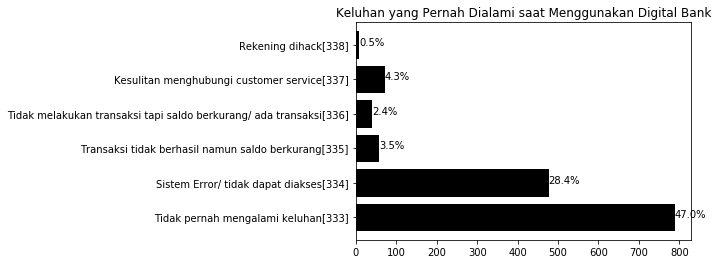

In [158]:
bikinbarh(333,338,"Keluhan yang Pernah Dialami saat Menggunakan Digital Bank")

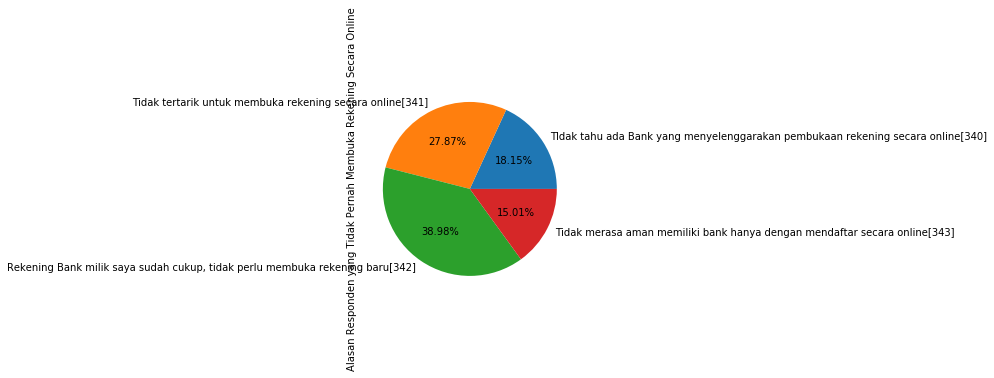

In [159]:
bikinpie(340,343,"Alasan Responden yang Tidak Pernah Membuka Rekening Secara Online")

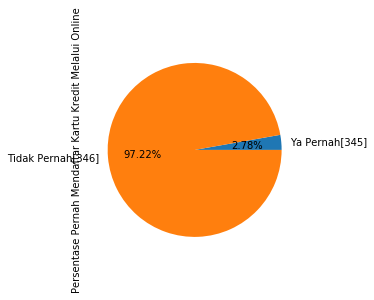

In [160]:
bikinpie(345,346,"Persentase Pernah Mendaftar Kartu Kredit Melalui Online")

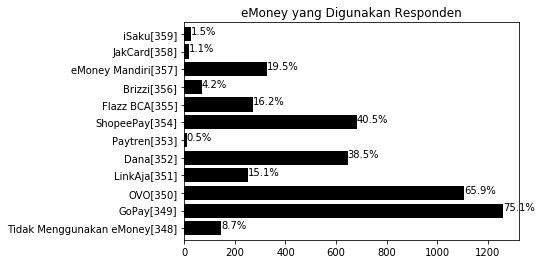

In [161]:
bikinbarh(348,359,"eMoney yang Digunakan Responden")

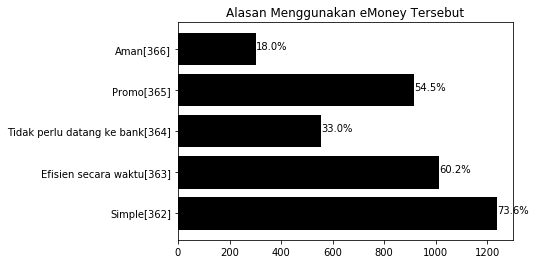

In [162]:
bikinbarh(362,366,"Alasan Menggunakan eMoney Tersebut")

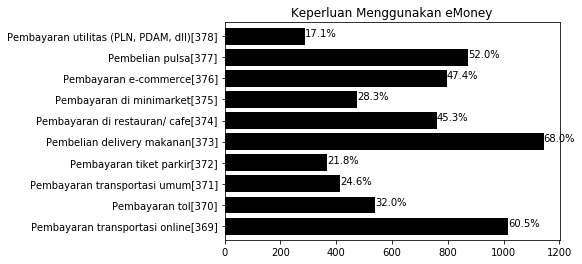

In [163]:
bikinbarh(369,378,"Keperluan Menggunakan eMoney")

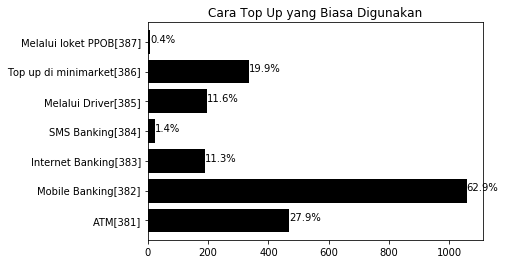

In [164]:
bikinbarh(381,387,"Cara Top Up yang Biasa Digunakan")

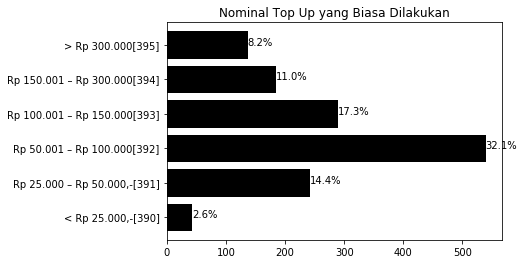

In [165]:
bikinbarh(390,395,"Nominal Top Up yang Biasa Dilakukan")

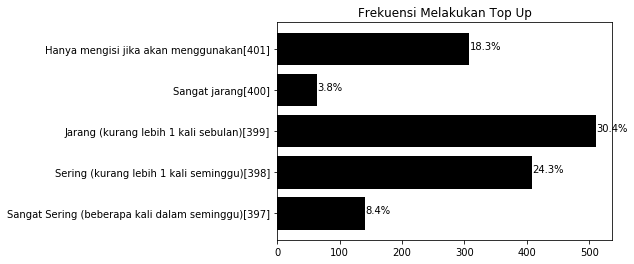

In [166]:
bikinbarh(397,401,"Frekuensi Melakukan Top Up")

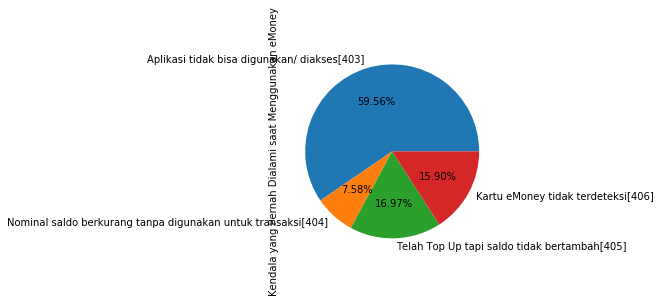

In [167]:
bikinpie(403,406,"Kendala yang Pernah Dialami saat Menggunakan eMoney")

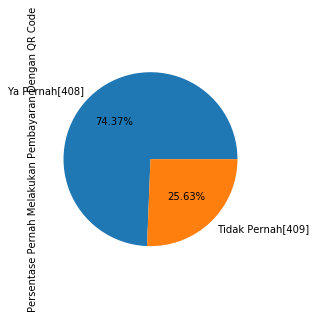

In [168]:
bikinpie(408,409,"Persentase Pernah Melakukan Pembayaran Dengan QR Code")

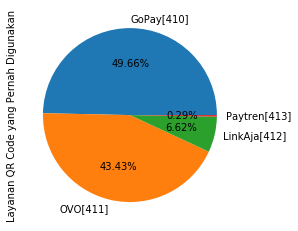

In [169]:
bikinpie(410,413,"Layanan QR Code yang Pernah Digunakan")

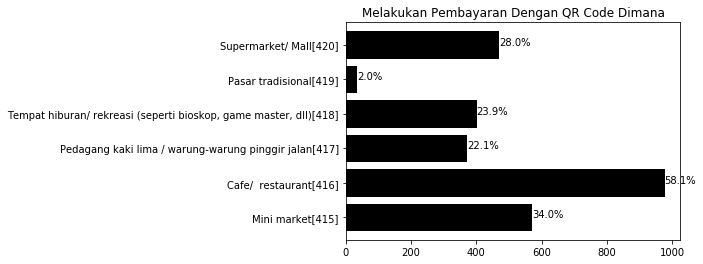

In [170]:
bikinbarh(415,420,"Melakukan Pembayaran Dengan QR Code Dimana")

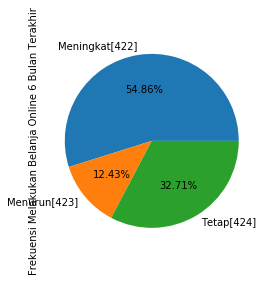

In [171]:
bikinpie(422,424,"Frekuensi Melakukan Belanja Online 6 Bulan Terakhir")

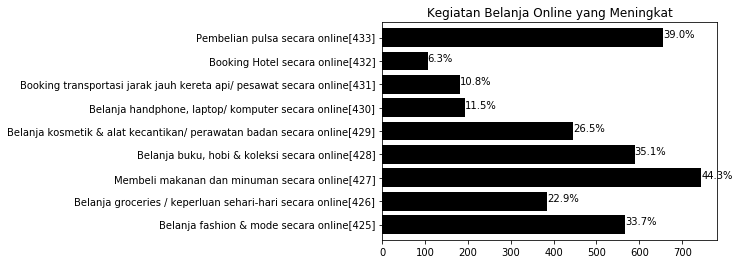

In [172]:
bikinbarh(425,433,"Kegiatan Belanja Online yang Meningkat")

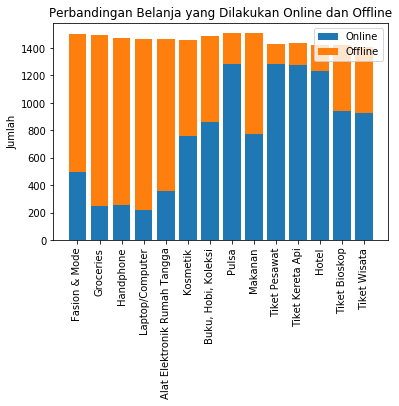

In [215]:
labels = ["Fasion & Mode","Groceries","Handphone","Laptop/Computer","Alat Elektronik Rumah Tangga","Kosmetik","Buku, Hobi, Koleksi","Pulsa","Makanan","Tiket Pesawat","Tiket Kereta Api","Hotel","Tiket Bioskop","Tiket Wisata"]
online = [data[data.columns[i]].notnull().sum() for i in range(435,462,2)]
offline = [data[data.columns[i]].notnull().sum() for i in range(436,463,2)]

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, online,   label='Online')
ax.bar(labels, offline,  bottom=online,
       label='Offline')

ax.set_xticklabels(labels,rotation = 90)
ax.set_ylabel('Jumlah')
ax.set_title('Perbandingan Belanja yang Dilakukan Online dan Offline')
ax.legend()

plt.show()

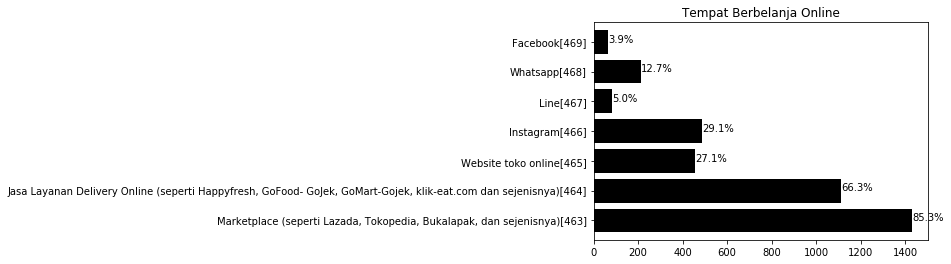

In [174]:
bikinbarh(463,469,"Tempat Berbelanja Online")

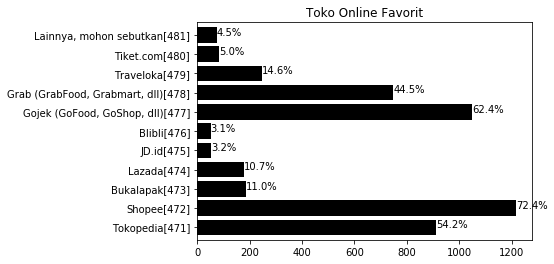

In [175]:
bikinbarh(471,481,"Toko Online Favorit")

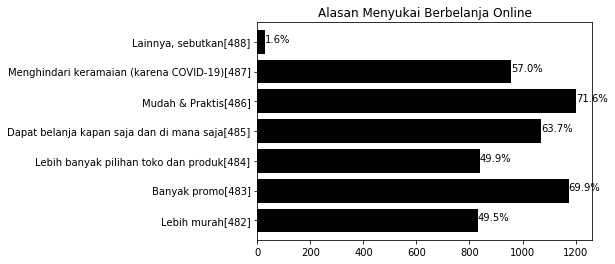

In [176]:
bikinbarh(482,488,"Alasan Menyukai Berbelanja Online")

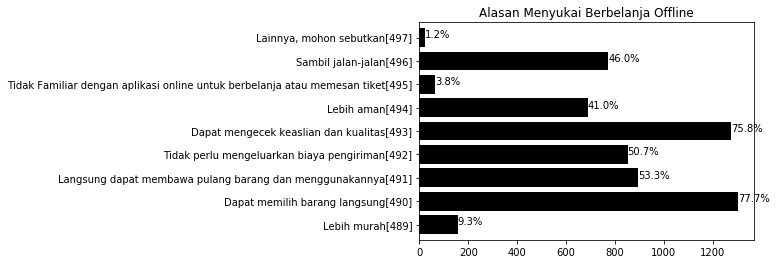

In [177]:
bikinbarh(489,497,"Alasan Menyukai Berbelanja Offline")

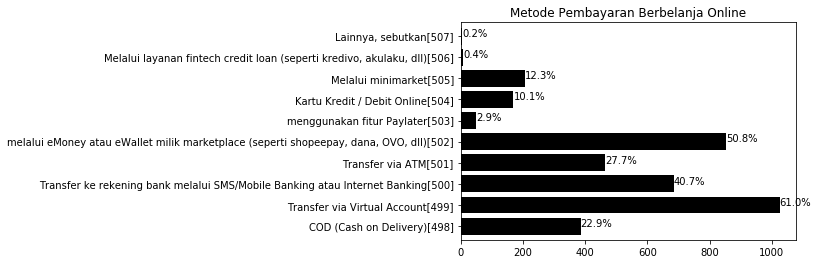

In [178]:
bikinbarh(498,507,"Metode Pembayaran Berbelanja Online")

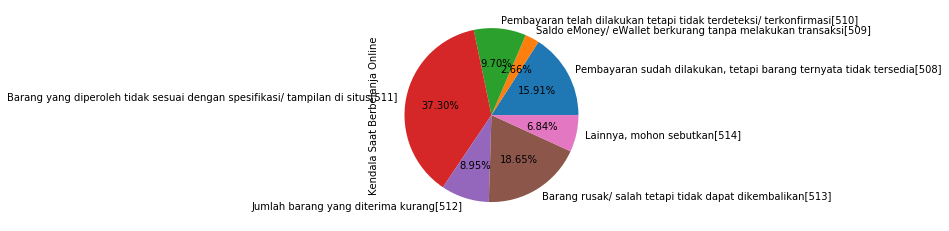

In [179]:
bikinpie(508,514,"Kendala Saat Berbelanja Online")

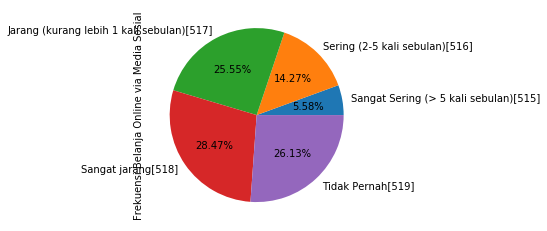

In [180]:
bikinpie(515,519,"Frekuensi Belanja Online via Media Sosial")

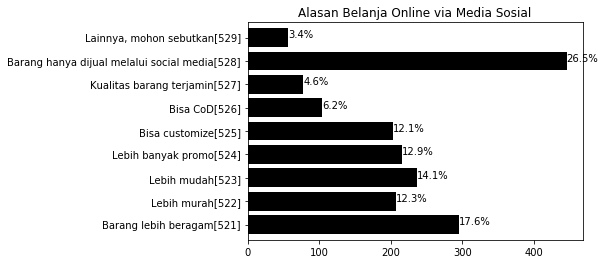

In [181]:
bikinbarh(521,529,"Alasan Belanja Online via Media Sosial")

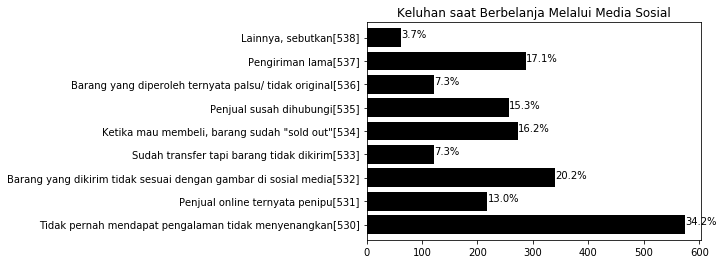

In [182]:
bikinbarh(530,538,"Keluhan saat Berbelanja Melalui Media Sosial")

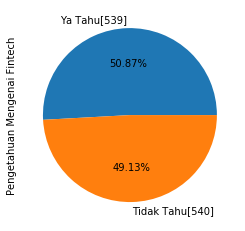

In [183]:
bikinpie(539,540,"Pengetahuan Mengenai Fintech")

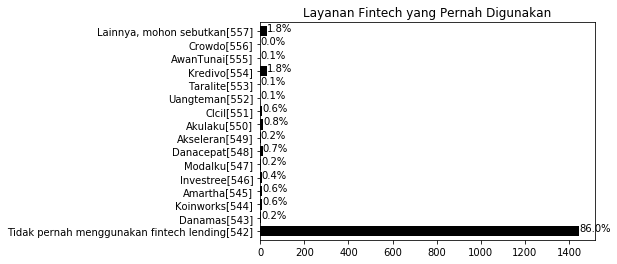

In [184]:
bikinbarh(542,557,"Layanan Fintech yang Pernah Digunakan")

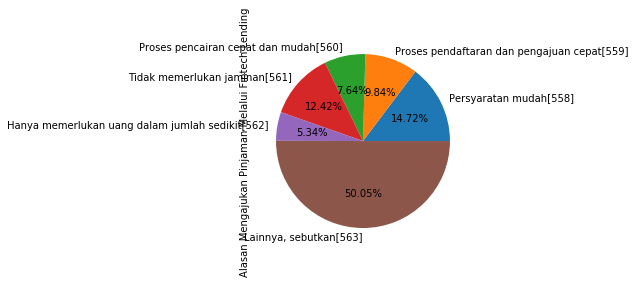

In [185]:
bikinpie(558,563,"Alasan Mengajukan Pinjaman Melalui Fintech Lending")

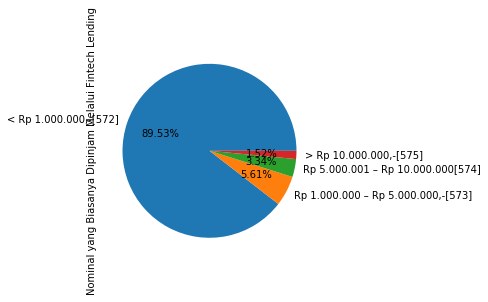

In [186]:
bikinpie(572,575,"Nominal yang Biasanya Dipinjam Melalui Fintech Lending")

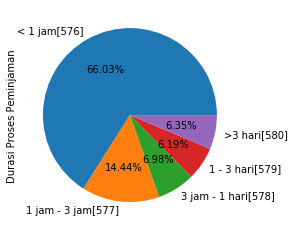

In [187]:
bikinpie(576,580,"Durasi Proses Peminjaman")

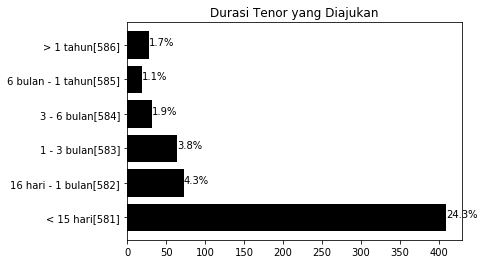

In [188]:
bikinbarh(581,586,"Durasi Tenor yang Diajukan")

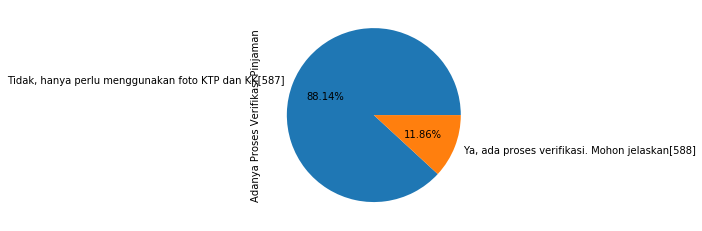

In [189]:
bikinpie(587,588,"Adanya Proses Verifikasi Pinjaman")

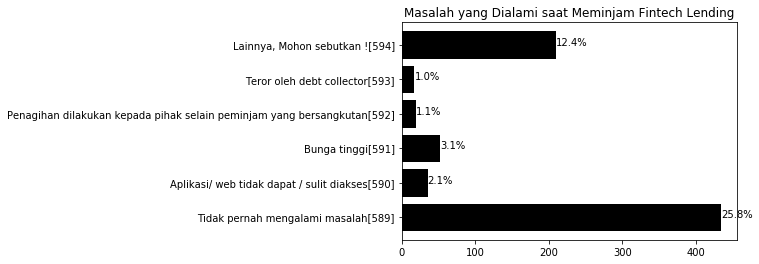

In [190]:
bikinbarh(589,594,"Masalah yang Dialami saat Meminjam Fintech Lending")

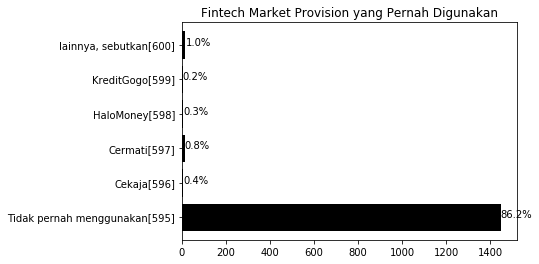

In [191]:
bikinbarh(595,600,"Fintech Market Provision yang Pernah Digunakan")

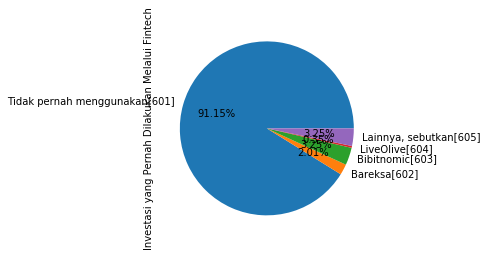

In [192]:
bikinpie(601,605,"Investasi yang Pernah Dilakukan Melalui Fintech")

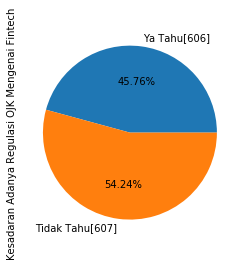

In [193]:
bikinpie(606,607,"Kesadaran Adanya Regulasi OJK Mengenai Fintech")

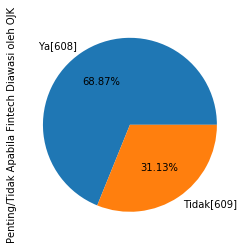

In [194]:
bikinpie(608,609,"Penting/Tidak Apabila Fintech Diawasi oleh OJK")

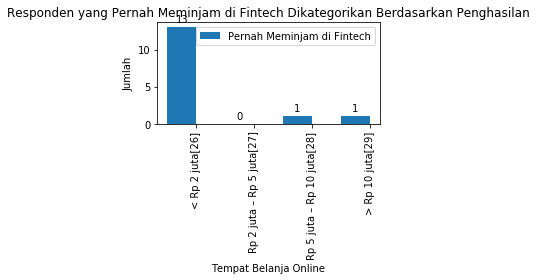

In [198]:
res1 = [i for i, val in enumerate(data[data.columns[543:558]].notnull()) if val]
val1 = [data[data.columns[i]][res1].notnull().sum() for i in range(26,30)]
labels = [data.columns[i] for i in range(26,30)]
x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, val1, width, label='Pernah Meminjam di Fintech')
ax.set_ylabel('Jumlah')
ax.set_xlabel('Range Penghasilan')
ax.set_title('Responden yang Pernah Meminjam di Fintech Dikategorikan Berdasarkan Penghasilan')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation = 90)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()

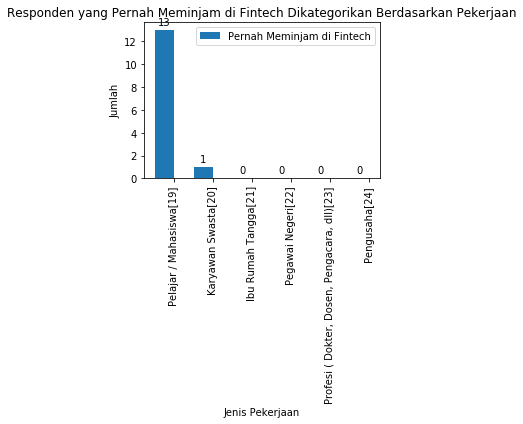

In [211]:
res1 = [i for i, val in enumerate(data[data.columns[543:558]].notnull()) if val]
val1 = [data[data.columns[i]][res1].notnull().sum() for i in range(19,25)]

labels = [data.columns[i] for i in range(19,25)]
x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(6,6))
rects1 = ax.bar(x - width/2, val1, width, label='Pernah Meminjam di Fintech')
ax.set_ylabel('Jumlah')
ax.set_xlabel('Jenis Pekerjaan')
ax.set_title('Responden yang Pernah Meminjam di Fintech Dikategorikan Berdasarkan Pekerjaan')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation = 90)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()

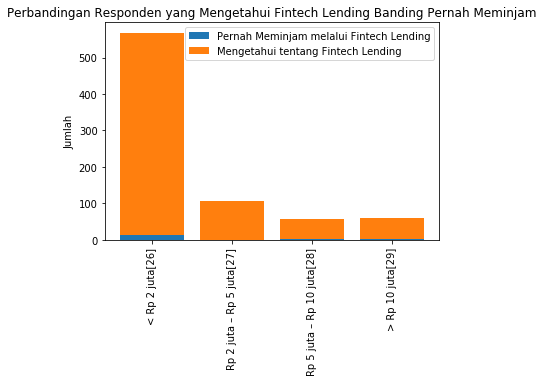

In [205]:
labels = [data.columns[i] for i in range(26,30)]
res1 = [i for i, val in enumerate(data[data.columns[539]].notnull()) if val]
res2 = [i for i, val in enumerate(data[data.columns[543:558]].notnull()) if val]
val1 = [data[data.columns[i]][res1].notnull().sum() for i in range(26,30)]
val2 = [data[data.columns[i]][res2].notnull().sum() for i in range(26,30)]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, val2,   label='Pernah Meminjam melalui Fintech Lending')
ax.bar(labels, val1,  bottom=val2,
       label='Mengetahui tentang Fintech Lending')

ax.set_xticklabels(labels,rotation = 90)
ax.set_ylabel('Jumlah')
ax.set_title('Perbandingan Responden yang Mengetahui Fintech Lending Banding Pernah Meminjam')
ax.legend()

plt.show()

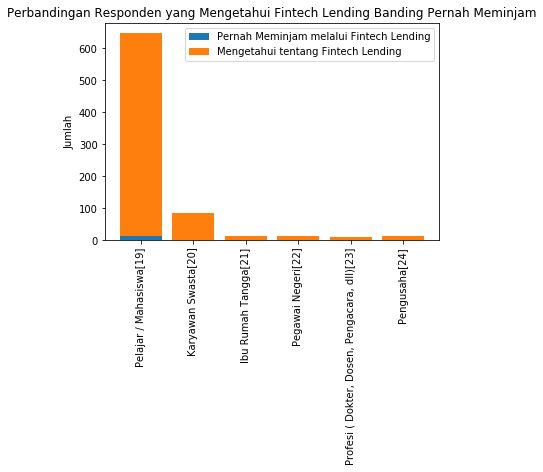

In [212]:
labels = [data.columns[i] for i in range(19,25)]
res1 = [i for i, val in enumerate(data[data.columns[539]].notnull()) if val]
res2 = [i for i, val in enumerate(data[data.columns[543:558]].notnull()) if val]
val1 = [data[data.columns[i]][res1].notnull().sum() for i in range(19,25)]
val2 = [data[data.columns[i]][res2].notnull().sum() for i in range(19,25)]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, val2,   label='Pernah Meminjam melalui Fintech Lending')
ax.bar(labels, val1,  bottom=val2,
       label='Mengetahui tentang Fintech Lending')

ax.set_xticklabels(labels,rotation = 90)
ax.set_ylabel('Jumlah')
ax.set_title('Perbandingan Responden yang Mengetahui Fintech Lending Banding Pernah Meminjam')
ax.legend()

plt.show()

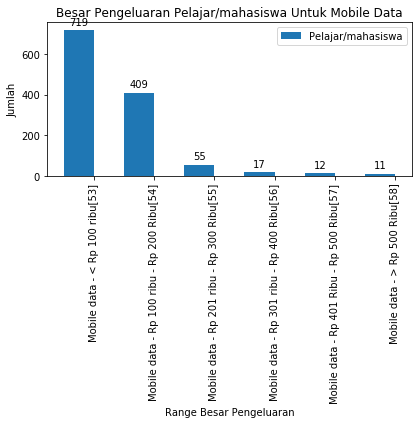

In [217]:
res1 = [i for i, val in enumerate(data[data.columns[19]].notnull()) if val]
val1 = [data[data.columns[i]][res1].notnull().sum() for i in range(53,59)]

labels = [data.columns[i] for i in range(53,59)]
x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(6,6))
rects1 = ax.bar(x - width/2, val1, width, label='Pelajar/mahasiswa')
ax.set_ylabel('Jumlah')
ax.set_xlabel('Range Besar Pengeluaran')
ax.set_title('Besar Pengeluaran Pelajar/mahasiswa Untuk Mobile Data')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation = 90)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()

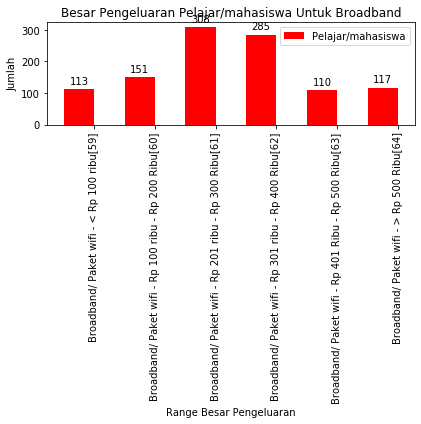

In [220]:
res1 = [i for i, val in enumerate(data[data.columns[19]].notnull()) if val]
val1 = [data[data.columns[i]][res1].notnull().sum() for i in range(59,65)]

labels = [data.columns[i] for i in range(59,65)]
x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(6,6))
rects1 = ax.bar(x - width/2, val1, width, label='Pelajar/mahasiswa',color = "Red")
ax.set_ylabel('Jumlah')
ax.set_xlabel('Range Besar Pengeluaran')
ax.set_title('Besar Pengeluaran Pelajar/mahasiswa Untuk Broadband')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation = 90)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()

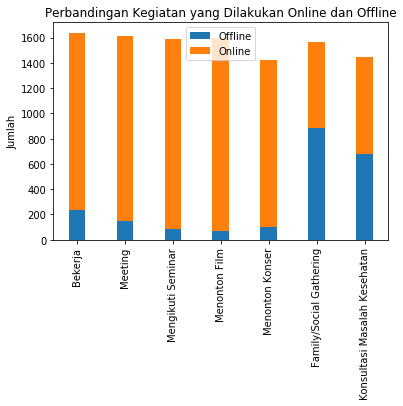

In [224]:
labels = ["Bekerja","Meeting","Mengikuti Seminar","Menonton Film","Menonton Konser","Family/Social Gathering","Konsultasi Masalah Kesehatan"]
offline= [data[data.columns[i]].notnull().sum() for i in range(165,178,2)]
online = [data[data.columns[i]].notnull().sum() for i in range(166,179,2)]

#labels = [data.columns[i] for i in range(4)]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, offline, width,  label='Offline')
ax.bar(labels, online, width,  bottom=offline,
       label='Online')

ax.set_xticklabels(labels,rotation = 90)
ax.set_ylabel('Jumlah')
ax.set_title('Perbandingan Kegiatan yang Dilakukan Online dan Offline')
ax.legend()

plt.show()

In [222]:
data.to_csv("dataprobstat_ac.csv")